<a href="https://colab.research.google.com/github/rammafitra/PyTorch_Model_DeepLearning_scratch/blob/main/CNN_Multi_Classification_Groceries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown "https://drive.google.com/uc?id=1n1Wajr8j9quYXaB2sfCmC9sDpTA2y0gl&export=download"


Downloading...
From: https://drive.google.com/uc?id=1n1Wajr8j9quYXaB2sfCmC9sDpTA2y0gl&export=download
To: /content/train.zip
98.5MB [00:00, 102MB/s] 


In [3]:
!gdown "https://drive.google.com/uc?id=10OPlOIT3niiBPzxfsXLJm11b_6nQSRF-&export=download"


Downloading...
From: https://drive.google.com/uc?id=10OPlOIT3niiBPzxfsXLJm11b_6nQSRF-&export=download
To: /content/test.zip
13.4MB [00:00, 62.9MB/s]


In [4]:
!unzip /content/test.zip

Archive:  /content/test.zip
   creating: test/
   creating: test/JUICE/
  inflating: test/JUICE/JUICE0041.png  
  inflating: test/JUICE/JUICE0042.png  
  inflating: test/JUICE/JUICE0043.png  
  inflating: test/JUICE/JUICE0044.png  
  inflating: test/JUICE/JUICE0045.png  
  inflating: test/JUICE/JUICE0046.png  
  inflating: test/JUICE/JUICE0047.png  
  inflating: test/JUICE/JUICE0048.png  
  inflating: test/JUICE/JUICE0049.png  
  inflating: test/JUICE/JUICE0050.png  
  inflating: test/JUICE/JUICE0147.png  
  inflating: test/JUICE/JUICE0148.png  
  inflating: test/JUICE/JUICE0149.png  
  inflating: test/JUICE/JUICE0150.png  
  inflating: test/JUICE/JUICE0151.png  
  inflating: test/JUICE/JUICE0152.png  
  inflating: test/JUICE/JUICE0153.png  
  inflating: test/JUICE/JUICE0154.png  
  inflating: test/JUICE/JUICE0155.png  
  inflating: test/JUICE/JUICE0156.png  
  inflating: test/JUICE/JUICE0180.png  
  inflating: test/JUICE/JUICE0182.png  
  inflating: test/JUICE/JUICE0188.png  
  inflat

In [5]:
!unzip /content/train.zip

Archive:  /content/train.zip
   creating: train/
   creating: train/JUICE/
  inflating: train/JUICE/JUICE0000.png  
  inflating: train/JUICE/JUICE0001.png  
  inflating: train/JUICE/JUICE0002.png  
  inflating: train/JUICE/JUICE0003.png  
  inflating: train/JUICE/JUICE0004.png  
  inflating: train/JUICE/JUICE0005.png  
  inflating: train/JUICE/JUICE0006.png  
  inflating: train/JUICE/JUICE0007.png  
  inflating: train/JUICE/JUICE0008.png  
  inflating: train/JUICE/JUICE0009.png  
  inflating: train/JUICE/JUICE0010.png  
  inflating: train/JUICE/JUICE0011.png  
  inflating: train/JUICE/JUICE0012.png  
  inflating: train/JUICE/JUICE0013.png  
  inflating: train/JUICE/JUICE0014.png  
  inflating: train/JUICE/JUICE0015.png  
  inflating: train/JUICE/JUICE0016.png  
  inflating: train/JUICE/JUICE0017.png  
  inflating: train/JUICE/JUICE0018.png  
  inflating: train/JUICE/JUICE0019.png  
  inflating: train/JUICE/JUICE0020.png  
  inflating: train/JUICE/JUICE0021.png  
  inflating: train/JUIC

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np
import random

# seed
random.seed(113)
torch.manual_seed(113)
torch.cuda.manual_seed(113)
np.random.seed(113)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


#**Load Dataset**

In [7]:
train_dir = "train/"
test_dir = "test/"

img_size = 150

train_transform = transforms.Compose([
    transforms.CenterCrop(img_size),
    transforms.RandomRotation(5), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


test_transform = transforms.Compose([
    transforms.CenterCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_img = datasets.ImageFolder(train_dir, transform=train_transform)
test_img = datasets.ImageFolder(test_dir, transform=test_transform)

#**Explore the Data**

In [8]:
print("train_img type   :",type(train_img))
print("train_img length :",len(train_img))
print("test_img length :",len(test_img))
print("train_img classes:",train_img.classes)
print("train_img[0] type:",type(train_img[0]))
print("train_img[0][0] t:",type(train_img[0][0]))
print("train_img[0][1] t:",type(train_img[0][1]))
print("train_img[0][0] s:",train_img[0][0].size())
print("train_img[0][1]  :",train_img[0][1])

n_labels = len(train_img.classes)

train_img type   : <class 'torchvision.datasets.folder.ImageFolder'>
train_img length : 940
test_img length : 120
train_img classes: ['JUICE', 'MILK', 'SODA', 'VINEGAR', 'WATER']
train_img[0] type: <class 'tuple'>
train_img[0][0] t: <class 'torch.Tensor'>
train_img[0][1] t: <class 'int'>
train_img[0][0] s: torch.Size([3, 150, 150])
train_img[0][1]  : 0


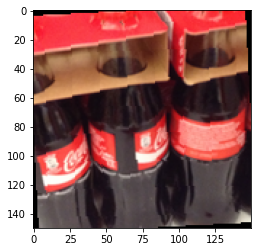

SODA


In [20]:
def imshow(data_image, tensor=False):
    image = data_image[0]
    label = data_image[1]
    image = image.numpy().transpose((1, 2, 0))

    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5],)
    image = std * image + mean
    image = np.clip(image, 0, 1)

    plt.imshow(image)
    plt.show()
    
    print(train_img.classes[label])

imshow(train_img[500])

#**Create The Loader**

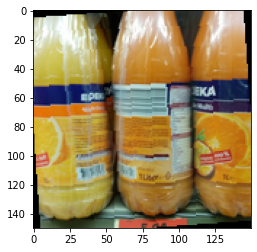

JUICE


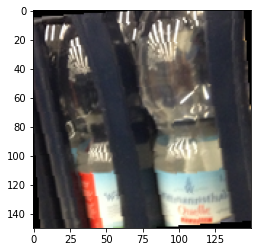

WATER


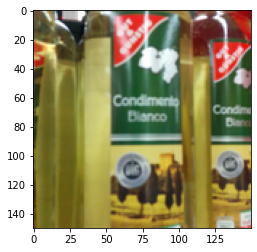

VINEGAR


In [23]:
trainloaders = torch.utils.data.DataLoader(train_img, batch_size=64, shuffle=True)
testloaders = torch.utils.data.DataLoader(test_img, batch_size=32, shuffle=True)

for image, label in trainloaders:
    for i in range(3):
        imshow((image[i], label[i]))
    break

#**Create The Model**

In [25]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.features = torch.nn.Sequential(
                            nn.Conv2d(3, 16, kernel_size=4, stride=1, padding=0),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),
                            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=3, stride=2, padding=0))
        self.classifier = torch.nn.Sequential(
                            nn.Linear(39200, 512),
                            nn.ReLU(),
                            nn.Dropout(),
                            nn.Linear(512, 5))
    
    def forward(self, x):
        x = self.features(x)
        x = x.reshape(x.shape[0], -1)
        x = self.classifier(x)
        return x
    
model = Net()
model.to(device)

Net(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=39200, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=5, bias=True)
  )
)

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epoch = 20

In [27]:
model.train()

for i in range(epoch):
    total_loss = 0
    total_sample = 0    
    total_correct = 0
    
    for image, label in trainloaders:
        image = image.to(device)
        label = label.to(device)
        
        out = model(image)
        
        loss = criterion(out, label)
        total_loss += loss.item()
        total_sample += len(label)
        total_correct += torch.sum(torch.max(out,1)[1]==label).item()*1.0
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("epoch", i, total_loss/total_sample, total_correct/total_sample)

epoch 0 0.03313754048753292 0.3468085106382979
epoch 1 0.01968638059940744 0.5095744680851064
epoch 2 0.018513942589151098 0.5276595744680851
epoch 3 0.016504707805653836 0.5936170212765958
epoch 4 0.014946414879027833 0.6436170212765957
epoch 5 0.013762653634903279 0.674468085106383
epoch 6 0.012145000759591448 0.7148936170212766
epoch 7 0.011235832660756213 0.7265957446808511
epoch 8 0.009879047312635057 0.7595744680851064
epoch 9 0.009421430433050115 0.7776595744680851
epoch 10 0.007888144096161457 0.8170212765957446
epoch 11 0.006851113571765575 0.8382978723404255
epoch 12 0.005848645244507079 0.8808510638297873
epoch 13 0.0053015752992731455 0.8829787234042553
epoch 14 0.0046496129099358905 0.9127659574468086
epoch 15 0.004210269324322964 0.9117021276595745
epoch 16 0.0036490405414332733 0.9276595744680851
epoch 17 0.003594255138267862 0.9127659574468086
epoch 18 0.003505987769111674 0.9276595744680851
epoch 19 0.0025849628400929432 0.948936170212766


In [28]:
model.eval()
total_loss = 0
total_sample = 0    
total_correct = 0

for image, label in testloaders:
    image = image.to(device)
    label = label.to(device)
    
    out = model(image)

    loss = criterion(out, label)
    total_loss += loss.item()
    total_sample += len(label)
    total_correct += torch.sum(torch.max(out, 1)[1] == label).item()*1.0


print("test loss", total_loss/total_sample)
print("test accuracy", total_correct/total_sample)

test loss 0.03391608993212382
test accuracy 0.65


#**Sanity Check**

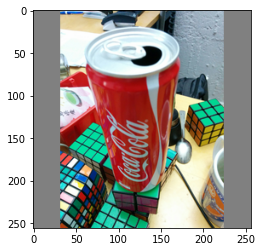

In [36]:
imagepath = '/content/train/SODA/SODA0001.png'
image_test = Image.open(imagepath)
plt.imshow(image_test)
plt.show()

In [37]:
image_transformed = test_transform(image_test) 
image_transformed = image_transformed.unsqueeze(0).to(device)
out = model(image_transformed)
print(out)
print("PREDICTION:", train_img.classes[torch.max(out,1)[1]])

tensor([[-0.9701, -9.5338, 10.1114, -2.0555, -0.3838]], device='cuda:0',
       grad_fn=<AddmmBackward>)
PREDICTION: SODA
